# **Part 1 : Load the data and make a datetime index**

In [77]:
import pandas as pd
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv')
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [78]:
pd.to_datetime(df['date'])

0       1970-01-01 00:00:00.019790101
1       1970-01-01 00:00:00.019790102
2       1970-01-01 00:00:00.019790103
3       1970-01-01 00:00:00.019790104
4       1970-01-01 00:00:00.019790105
                     ...             
15336   1970-01-01 00:00:00.020201227
15337   1970-01-01 00:00:00.020201228
15338   1970-01-01 00:00:00.020201229
15339   1970-01-01 00:00:00.020201230
15340   1970-01-01 00:00:00.020201231
Name: date, Length: 15341, dtype: datetime64[ns]

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [80]:
df['date'] = pd.to_datetime(df['date'], format ='%Y%m%d')
df['date']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

In [81]:
df = df.set_index('date')
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [82]:
df.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=15341, freq=None)

- #### **Type of index : datetime64[ns]**
- #### **This index doesn't have frequency**

In [83]:
df1 = df.loc['2000':,['precipitation', 'mean_temp', 'min_temp', 'max_temp', 'snow_depth']]
df1

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


In [84]:
df1.isnull().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [85]:
## Use .interpolate() to handle missing values of 'mean_temp', 'min_temp' and 'max_temp'
df1['mean_temp'] = df1['mean_temp'].interpolate()
df1['min_temp'] = df1['min_temp'].interpolate()
df1['max_temp'] = df1['max_temp'].interpolate()
df1.isnull().sum()

precipitation     390
mean_temp           0
min_temp            0
max_temp            0
snow_depth       1752
dtype: int64

In [86]:
## Use .fillna(0) to handle missing values of 'precipitation' and 'snow_depth'
df1['precipitation'] = df1['precipitation'].fillna(0)
df1['snow_depth'] = df1['snow_depth'].fillna(0)
df1.isnull().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

# **Part 2 : Answer the Questions with Visualizations (Using the Correct Frequency)**

### ***Q1: What month had the most precipitation between 2000 through 2010?***

In [87]:
ts = df1.copy()
ts

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,0.0
2020-12-28,0.2,1.1,-1.3,3.6,0.0
2020-12-29,0.0,2.6,1.1,4.1,0.0


In [88]:
ts_q1 = ts.loc['2000':'2010']
ts_q1

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2010-12-27,5.0,0.2,-4.6,8.0,1.0
2010-12-28,0.4,5.3,2.5,9.5,0.0
2010-12-29,1.4,6.8,4.1,7.7,0.0


In [89]:
ts_q1_res = ts_q1['precipitation'].resample('M').sum()
ts_q1_res

date
2000-01-31    14.3
2000-02-29    62.2
2000-03-31    13.4
2000-04-30    71.8
2000-05-31    68.4
              ... 
2010-08-31    83.8
2010-09-30    38.0
2010-10-31    61.0
2010-11-30    22.0
2010-12-31    21.2
Freq: M, Name: precipitation, Length: 132, dtype: float64

In [92]:
day_preci_max = ts_q1['precipitation'].idxmax()
day_preci_max

Timestamp('2000-10-29 00:00:00')

In [93]:
max_preci = ts_q1['precipitation'].loc[day_preci_max]
max_preci

36.6

In [95]:
print(f"The highest daily preciptation was {max_preci} inches, which occured on {day_preci_max.strftime('%B %d, %Y')} which was a {day_preci_max.day_name()}.")

The highest daily preciptation was 36.6 inches, which occured on October 29, 2000 which was a Sunday.


<Axes: xlabel='date'>

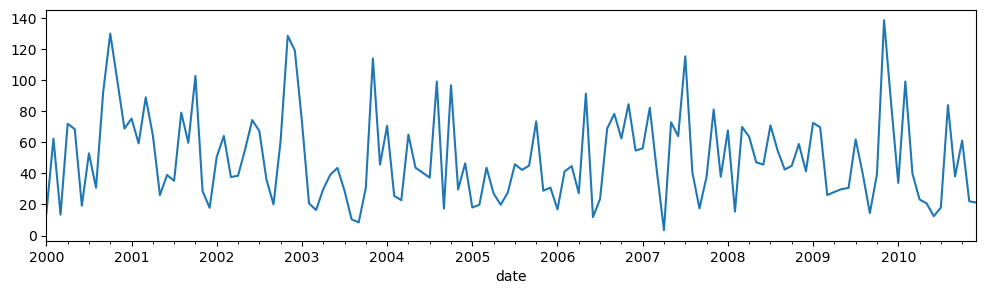

In [96]:
ts_q1_res.plot(figsize = (12,3))

In [109]:
month_preci_max = ts_q1_res.idxmax()
month_preci_max

Timestamp('2009-11-30 00:00:00', freq='M')

In [112]:
## 1st method
max_preci_monthly = ts_q1_res.max()
max_preci_monthly

138.4

In [113]:
## 2nd method
monthly_max_preci = ts_q1_res.loc[month_preci_max]
monthly_max_preci

138.4

### ***Q2: Which year between 2000-2020 had the coolest average temperature?***

In [114]:
ts_ = df1.copy()
ts_

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,0.0
2020-12-28,0.2,1.1,-1.3,3.6,0.0
2020-12-29,0.0,2.6,1.1,4.1,0.0


In [115]:
ts_q2_res = ts_['mean_temp'].resample('Y').mean()
ts_q2_res

date
2000-12-31    11.575683
2001-12-31    11.331507
2002-12-31    12.084247
2003-12-31    12.114521
2004-12-31    11.900683
2005-12-31    11.822877
2006-12-31    12.290822
2007-12-31    11.944384
2008-12-31    11.326776
2009-12-31    11.721644
2010-12-31    10.657397
2011-12-31    12.366438
2012-12-31    11.300956
2013-12-31    11.166301
2014-12-31    12.658904
2015-12-31    12.123699
2016-12-31    11.906284
2017-12-31    12.242466
2018-12-31    12.501370
2019-12-31    12.206164
2020-12-31    12.723634
Freq: A-DEC, Name: mean_temp, dtype: float64

<Axes: xlabel='date'>

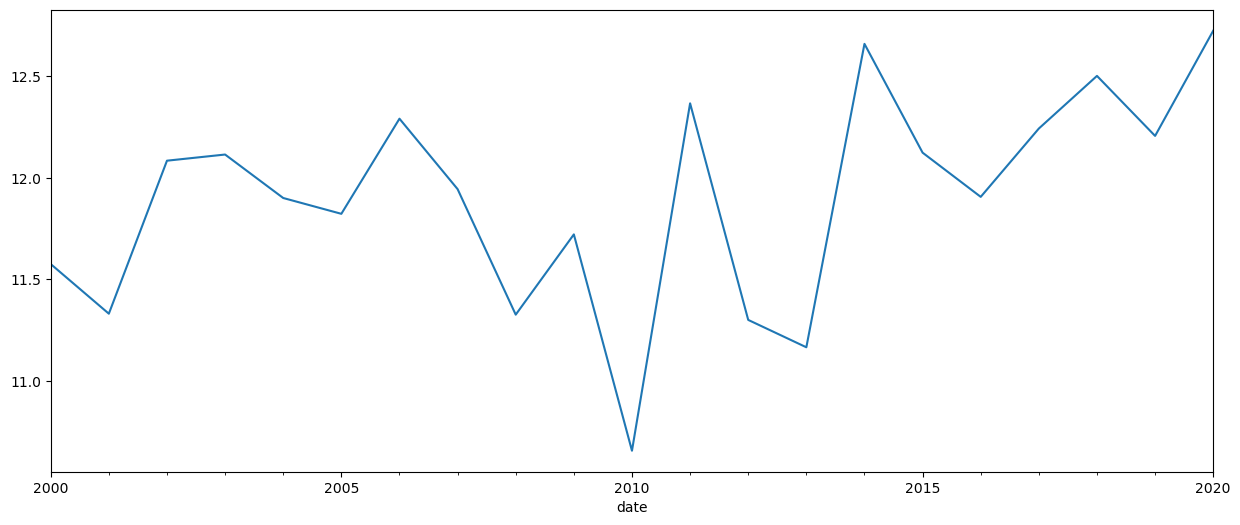

In [117]:
ts_q2_res.plot(figsize = (15,6))

In [121]:
coolest_year = ts_q2_res.idxmin()
coolest_year.strftime('%Y')

'2010'

In [123]:
avr_cool_temp = ts_q2_res.loc[coolest_year]
avr_cool_temp.round(2)

10.66

In [124]:
print(f"The coolest average yearly temperature was {avr_cool_temp.round(2)} degrees, which occured in {coolest_year.strftime('%Y')}.")

The coolest average yearly temperature was 10.66 degrees, which occured in 2010.


AttributeError: 'Axes' object has no attribute 'set_major_locator'

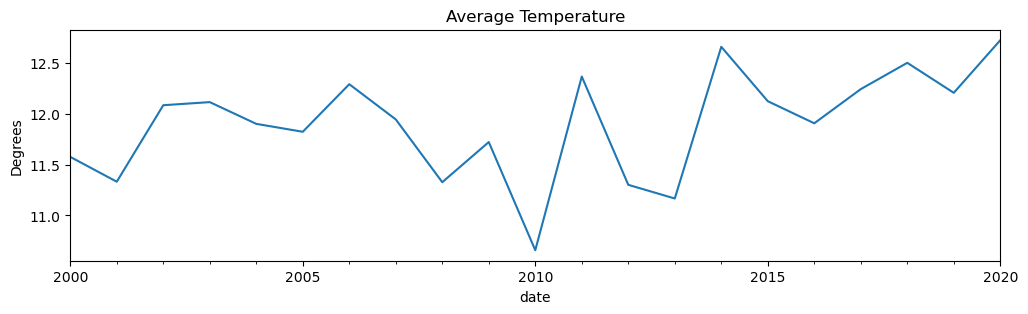

In [135]:
ax = ts_q2_res.plot(figsize = (12,3))
ax.set( title='Average Temperature',
      ylabel='Degrees')

# customize major ticks 
major_loc =  mdates.YearLocator(5)
major_fmt = mdates.DateFormatter("%Y")

ax.set_major_locator(major_loc)
ax.set_major_formatter(major_fmt)
ax.grid(which='major',axis='x',color='k')
